## Constructor University - Data Analytics Fall 2024

#### Week 1 - Lab Session

This lab serves as an introduction to R for the Data Analytics course at Constructor University during the Fall 2024 semester. Its purpose is to familiarize students with R as a programming language for data science and analytics, complementing the theoretical discussions covered in class.

The lab will emphasize the practical application of the theoretical concepts discussed in lectures. While we will cover key aspects of the R programming language, our primary focus will be on the specific tools and techniques that will enable you to effectively understand and complete the course.

#### Course Textbook and Lab Philosophy

R, like any programming language, evolves continuously with new tools and packages to meet the growing demands of data analytics. Our goal with these labs is to introduce you to the most essential and up-to-date tools and packages in R. By doing so, we aim to equip you with the skills and knowledge necessary to effectively utilize R for data analysis, ensuring you are well-prepared to tackle real-world data challenges both during the course and in your future career.

This course will follow closely the textbook `Introduction to Statistical Learning.` The book provides implementations in both `Python` and `R`. In particular, the textbook use base `R` implementation for exercises. As noted earlier, while you will learn base R throughout the course, we will predominantly leverage packages to achieve more efficient and effective data analysis and visualization. These packages will streamline many processes and provide a more intuitive and powerful framework for handling data.

#### Core Modules/Packages for the Course

The course will predominantly use the following packages:

**`Tidyverse`**: A collection of R packages designed for data science, making it easier to import, tidy, transform, visualize, and model data.

**`ggplot2`**: Part of the Tidyverse, this package is a powerful tool for creating complex and aesthetically pleasing visualizations.

**`Tidymodels`**: A suite of packages for modeling and machine learning using tidy data principles, providing a consistent and flexible framework for analysis.

<br>

## The `tidyverse`

The `tidyverse` package is an opinionated collection of R packages designed for data science and machine learning. It enforces good practices and discourages bad practices by providing a consistent and cohesive set of tools that work well together. The tidyverse simplifies many common data tasks, promoting clear and readable code, and making it easier to transform, visualize, and model data.

Let's begin by installing and loading up a few packages.

In [1]:
# if you don't have it installed
#install.packages('tidyverse')

# loading tidyverse
library(tidyverse)
options(tidyverse.quiet = TRUE)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (1741853526.py, line 6)

### Loading Data

In most cases, the first step to analyzing data will be reading and/or loading datasets. For this example, we will use the `datasets` library which contains in-built data. We can use the function `data()` to import it.

In [1]:
data(mtcars)

From here on, mtcars can be used as a variable that contains the data `mtcars`. In the code below, we use a simple in-built function to check whether `mtcars` is a `data.frame` object.

In [2]:
is.data.frame(mtcars)

[1] TRUE

::: {.alert .alert-block .alert-info style="background-color:white"}
#### Dataframe vs. Tibble

There are some important difference to know about `data.frame` and `tibble` objects in R. You can read more about them but we will use a summary on this notebook:

**1. Printing**: Tibbles have a more user-friendly printing method that shows only the first 10 rows and the columns that fit on the screen, avoiding overwhelming output.

**2. Column Types**: Tibbles are stricter about column types and do not convert strings to factors by default, unlike data frames.

**3. Subsetting**: Tibbles do not allow partial matching of column names, reducing potential errors.

**4. Performance**: Tibbles are generally more modern and optimized for performance with large datasets compared to traditional data frames.
:::
<br>

With that in mind, we are going to be using the `tibble`. We can convert a `data.frame` object into a `tibble` object using the `as_tibble()` function.

In [5]:
mtcars <- as_tibble(mtcars)

# printing tibble object
print(mtcars)

# A tibble: 32 × 11
     mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
   <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1  21       6  160    110  3.9   2.62  16.5     0     1     4     4
 2  21       6  160    110  3.9   2.88  17.0     0     1     4     4
 3  22.8     4  108     93  3.85  2.32  18.6     1     1     4     1
 4  21.4     6  258    110  3.08  3.22  19.4     1     0     3     1
 5  18.7     8  360    175  3.15  3.44  17.0     0     0     3     2
 6  18.1     6  225    105  2.76  3.46  20.2     1     0     3     1
 7  14.3     8  360    245  3.21  3.57  15.8     0     0     3     4
 8  24.4     4  147.    62  3.69  3.19  20       1     0     4     2
 9  22.8     4  141.    95  3.92  3.15  22.9     1     0     4     2
10  19.2     6  168.   123  3.92  3.44  18.3     1     0     4     4
# ℹ 22 more rows


The object `mtcars` can be visualized with many alternatives. Since our emphasis is using tidyverse functions, we can look at a few.

<br>

**1.1. `slice_head()`**

The `slice_head` function is used to select the first few rows of a data frame or tibble, making it useful for quickly viewing the beginning of a dataset or extracting a subset of rows for analysis.

In [6]:
slice_head(mtcars, n = 5)

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


<br>

**1.2. `slice_tail()`**

Similarly, the `slice_tail` function returns `n` number of rows from bottom of the dataset.

In [7]:
slice_tail(mtcars, n = 4)

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
15.8,8,351,264,4.22,3.17,14.5,0,1,5,4
19.7,6,145,175,3.62,2.77,15.5,0,1,5,6
15.0,8,301,335,3.54,3.57,14.6,0,1,5,8
21.4,4,121,109,4.11,2.78,18.6,1,1,4,2


<br>

**1.3. `slice_sample()`**

The slice_sample() function in R, is used to randomly select a specified number or proportion of rows from a data frame or tibble.

In [8]:

slice_sample(mtcars, n = 5)

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4
10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4


### Data Dimensions

Another common task is understand the nature and dimensions of your dataset. This includes the number of columns and rows, the data types and even retrieving column headers. The following functions are useful in data dimension understanding. 
<br><br>

**`dim()`**

The `dim()` function returns the dimension of the data with the number of rows and the number of columns. In our dataset, we have 32 rows and 11 columns as seen in the output below.

In [9]:
dim(mtcars)

[1] 32 11

<br>

**`str()`**

The `str()` function returns the structure of the dataset, highlighting the **column name**, **datatype**, **total observations** and a sample of the **data points**.

In [10]:
str(mtcars)

tibble [32 × 11] (S3: tbl_df/tbl/data.frame)
 $ mpg : num [1:32] 21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num [1:32] 6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num [1:32] 160 160 108 258 360 ...
 $ hp  : num [1:32] 110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num [1:32] 3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num [1:32] 2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num [1:32] 16.5 17 18.6 19.4 17 ...
 $ vs  : num [1:32] 0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num [1:32] 1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num [1:32] 4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num [1:32] 4 4 1 1 2 1 4 2 2 4 ...


<br>

**`summary()`**

The `summary()` function in R provides a quick overview of the key statistics for each variable in a data frame or vector. For numeric data, it returns the minimum, 1st quartile, median, mean, 3rd quartile, and maximum values. For factors, it provides the frequency of each level. This function is useful for understanding the distribution and central tendencies of your data at a glance.

In [11]:
summary(mtcars)

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

**`names()`**

The `names` function returns the names of the variables in your data set.

In [12]:
names(mtcars)

[1] "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "vs"   "am"   "gear"
[11] "carb"

::: {.alert .alert-block .alert-info style="background-color:white"}
#### Getting Help

You may often encounter functions, objects and methods you may not understand. You can always use the format `?mtcars` to get the documentation for the object mtcars. This applies to objects and packages as well.
:::

In [13]:
?mtcars

mtcars                package:datasets                 R Documentation

_M_o_t_o_r _T_r_e_n_d _C_a_r _R_o_a_d _T_e_s_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     The data was extracted from the 1974 _Motor Trend_ US magazine,
     and comprises fuel consumption and 10 aspects of automobile design
     and performance for 32 automobiles (1973-74 models).

_U_s_a_g_e:

     mtcars
     
_F_o_r_m_a_t:

     A data frame with 32 observations on 11 (numeric) variables.

       [, 1]  mpg   Miles/(US) gallon                        
       [, 2]  cyl   Number of cylinders                      
       [, 3]  disp  Displacement (cu.in.)                    
       [, 4]  hp    Gross horsepower                         
       [, 5]  drat  Rear axle ratio                          
       [, 6]  wt    Weight (1000 lbs)                        
       [, 7]  qsec  1/4 mile time                            
       [, 8]  vs    Engine (0 = V-shaped, 1 = straight)      


<br>

## Data Wrangling with `tidyverse`

We will now delve deeper into the `tidyverse` to explore data wrangling functions. We will examine several functions provided by the `tidyverse` library and how they work together. To do this, we will use the `Coffee_Sales.csv` dataset, which is available on Kaggle and included in the course materials.


In [17]:
coffee_sales <- read.csv('../Datasets/Coffee_Sales.csv')
coffee_sales <- as_tibble(coffee_sales)

# peeking through the data
slice_head(coffee_sales, n = 10)

date,datetime,cash_type,card,money,coffee_name
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa


In [18]:
dim(coffee_sales)

[1] 976   6

In [19]:
names(coffee_sales)

[1] "date"        "datetime"    "cash_type"   "card"        "money"      
[6] "coffee_name"

<br>

### 1. The `select` function.

We now introduce the `select` function, which returns specified columns from the original dataset. In this example, we wish to retain the columns: `date`, `cash_type`, `money`, and `coffee_name`.

In [20]:
coffee_sales %>% 
        select(date, cash_type, money, coffee_name) %>%
        slice_sample(n = 10)

date,cash_type,money,coffee_name
<chr>,<chr>,<dbl>,<chr>
2024-05-29,card,37.72,Cappuccino
2024-05-21,cash,39.00,Latte
2024-03-02,cash,40.00,Latte
2024-07-06,card,32.82,Latte
2024-06-23,card,32.82,Americano with Milk
2024-03-15,cash,40.00,Latte
2024-04-14,cash,40.00,Latte
2024-05-30,card,37.72,Latte
2024-05-02,card,27.92,Americano


As noted above, `slice_sample` returns a sample of 10 observations from the subset of columns specified using the `select` function. An important and interesting idea here is the use of `%>%`, also known as the pipe operator.

<br>

### 2. Pipe Operator (`%>%`)

The pipe operator (`%>%`) allows for the chaining of multiple functions in a readable and concise manner. It passes the output of one function directly into the next function as an argument, enabling a smooth flow of data manipulation steps without the need for nested function calls, as in our example above.

Sometimes when using the select method, we wish to perform a negative selection. That is remove columns instead of picking the columns to stay. We can achieve this with the following method.


In [21]:
coffee_sales %>% select( -c(datetime, card)) %>% slice_sample(n = 10)

date,cash_type,money,coffee_name
<chr>,<chr>,<dbl>,<chr>
2024-06-15,card,37.72,Cocoa
2024-05-14,card,37.72,Cappuccino
2024-03-01,card,33.80,Americano with Milk
2024-06-09,card,32.82,Americano with Milk
2024-06-13,card,32.82,Americano with Milk
2024-03-16,card,28.90,Americano
2024-05-19,card,32.82,Americano with Milk
2024-03-03,card,28.90,Americano
2024-03-21,card,38.70,Latte


Notice that we get similar results.

### 3. The `renaming` function

Renaming columns/variables can make your data analysis easier and smoother as variables reflect their true meaning. In our example, we can now rename the columns in the following order:

`cash_type` --\> `payment_type`

`money` --\> `price`

`coffee_name` --\> `drink_name`

You can choose whichever names work for you.

In [22]:
coffee_sales %>% 
        # negative selection of columns - eliminate
        select(-c(datetime, card)) %>%
        # changing column names
        rename( payment_type = cash_type, price = money, drink_name = coffee_name) %>%
        # see the top 10 values 
        slice_head(n = 10)

date,payment_type,price,drink_name
<chr>,<chr>,<dbl>,<chr>
2024-03-01,card,38.7,Latte
2024-03-01,card,38.7,Hot Chocolate
2024-03-01,card,38.7,Hot Chocolate
2024-03-01,card,28.9,Americano
2024-03-01,card,38.7,Latte
2024-03-01,card,33.8,Americano with Milk
2024-03-01,card,38.7,Hot Chocolate
2024-03-01,card,33.8,Americano with Milk
2024-03-01,card,38.7,Cocoa


Before we move on to the filter function, a useful operation to know is how to return a unique set of values from a column.

### 4. The `distinct` function.

The distinct function is used to remove duplicate rows from a data frame or tibble. It helps in ensuring that the data contains only unique combinations of the specified columns. In our example, we want to know that distinct values exist for a specific column or set of columns.

In [23]:
coffee_sales %>% 
        # negative selection of columns - eliminate
        select(-c(datetime, card)) %>%
        # renaming column/variable names
        rename( payment_type = cash_type, price = money, drink_name = coffee_name) %>%
        distinct(drink_name)

drink_name
<chr>
Latte
Hot Chocolate
Americano
Americano with Milk
Cocoa
Cortado
Espresso
Cappuccino


### 5. The `filter` Function

The `filter` function sub-selects the data based on logical and mathematical comparison. This means that we can filter for observations of a specific name or value.

Below, we sub-select observations whose purchases are above 30 with cash for a specific set of drinks.


In [24]:
coffee_sales %>% 
        # negative selection of columns - eliminate
        select(-c(datetime, card)) %>%
        # renaming column/variable names
        rename( payment_type = cash_type, price = money, drink_name = coffee_name) %>%
        # using multiple filter selection
        filter( price >= 30, payment_type == 'cash', drink_name %in% c('Americano'))

date,payment_type,price,drink_name
<chr>,<chr>,<dbl>,<chr>
2024-03-10,cash,30,Americano
2024-03-11,cash,30,Americano
2024-03-21,cash,30,Americano
2024-03-31,cash,30,Americano
2024-04-05,cash,30,Americano
2024-04-09,cash,30,Americano


Now we see that we have a subset of cash payments for a specific coffee drink.

### 6. The `mutate` function

Often times, you may need to create a new variable based on transformations or calculations involving existing columns, enabling more complex data analysis and manipulation within your dataset. The `mutate` functions allows us to create new columns/variables.

In the example below, we will create a new variable that assigns value `cocoa` to a $chocolate$ related drink or `coffee` otherwise. Specifically, it will check if a drink name has $chocolate$ of $cocoa$ in it and assign it to `cocoa` and `coffee` otherwise


In [25]:
coffee_sales %>% 
        # negative selection of columns - eliminate
        select(-c(datetime, card)) %>%
        # renaming column/variable names
        rename( payment_type = cash_type, price = money, drink_name = coffee_name) %>%
        # using multiple filter selection
        # filter( price >= 30, payment_type == 'cash', drink_name %in% c('Americano')) %>%
        # creating a new column 
        mutate( drink_type =  ifelse(str_detect(drink_name, regex("chocolate|cocoa", ignore_case = TRUE)), "cocoa",  "coffee") ) %>%
        # show the first ten values
        slice_head( n = 10 )

date,payment_type,price,drink_name,drink_type
<chr>,<chr>,<dbl>,<chr>,<chr>
2024-03-01,card,38.7,Latte,coffee
2024-03-01,card,38.7,Hot Chocolate,cocoa
2024-03-01,card,38.7,Hot Chocolate,cocoa
2024-03-01,card,28.9,Americano,coffee
2024-03-01,card,38.7,Latte,coffee
2024-03-01,card,33.8,Americano with Milk,coffee
2024-03-01,card,38.7,Hot Chocolate,cocoa
2024-03-01,card,33.8,Americano with Milk,coffee
2024-03-01,card,38.7,Cocoa,cocoa


The above mutate function is a slightly more complicated than we have seen, however, it simply checks whether the column value has the words `chocolate` and/or `cocoa` or not and assigns the outcome respectively.

<br>

### 7. The `group_by` function

The next useful function is `group_by`, which allows us to summarize observational groups. The example below groups the data by the newly created column `drink_type`.

In [26]:
coffee_sales %>% 
        # negative selection of columns - eliminate
        select(-c(datetime, card)) %>%
        # renaming column/variable names
        rename( payment_type = cash_type, price = money, drink_name = coffee_name) %>%
        # using multiple filter selection
        # filter( price >= 30, payment_type == 'cash', drink_name %in% c('Americano')) %>%
        # creating a new column 
        mutate( drink_type =  ifelse(str_detect(drink_name, regex("chocolate|cocoa", ignore_case = TRUE)), "cocoa",  "coffee") ) %>%
        # implementing a groupby and showing the sample data.
        group_by( drink_type ) %>% glimpse()

Rows: 976
Columns: 5
Groups: drink_type [2]
$ date         <chr> "2024-03-01", "2024-03-01", "2024-03-01", "2024-03-01", "…
$ payment_type <chr> "card", "card", "card", "card", "card", "card", "card", "…
$ price        <dbl> 38.7, 38.7, 38.7, 28.9, 38.7, 33.8, 38.7, 33.8, 38.7, 33.…
$ drink_name   <chr> "Latte", "Hot Chocolate", "Hot Chocolate", "Americano", "…
$ drink_type   <chr> "coffee", "cocoa", "cocoa", "coffee", "coffee", "coffee",…


### 9. The `arrange` function

Finally, we look at the `arrange` function, which is used to sort the tibble object based on columns. This function allows you to order your data in ascending or descending order, making it easier to analyze and interpret specific trends or patterns.Finally, we look at the `arrange` function which is used to sort the tibble object based on columns.

In the example, below we sort the results of the previous `group_by` and `summarise` function by sorting the outcome based on `avg_price` and `drink_name`. Try and determine what this function does: `arrange( avg_price, desc(drink_name) )`


In [27]:
coffee_sales %>% 
    # renaming the columns
    rename( payment_type = cash_type, price = money, drink_name = coffee_name) %>%
    # groupby data by drink_name
    group_by( drink_name ) %>%
    # summarise data by computing metrics
    summarise( avg_price = mean(price), min_price = mean(price), max_price = max(price) ) %>%
    # sort variables by avg_price ascending, drink_name descending
    arrange( avg_price, desc(drink_name) )

drink_name,avg_price,min_price,max_price
<chr>,<dbl>,<dbl>,<dbl>
Espresso,23.57487,23.57487,25
Americano,28.22110,28.22110,30
Cortado,28.43977,28.43977,30
Americano with Milk,32.85119,32.85119,35
Hot Chocolate,37.74676,37.74676,40
Cappuccino,37.90712,37.90712,40
Latte,37.91300,37.91300,40
Cocoa,38.07857,38.07857,40


We have explored several functions within the `tidyverse` library, though there are many more to cover. As the course progresses, we will introduce additional functions to enhance your data manipulation skills. You are also encouraged to explore and experiment with these functions on your own. In the next section, we will delve into data visualization.

## Visualization with ggplot2

In this section, we introduce the visualization library `ggplot2`, which we will use extensively throughout this course. Starting with `ggplot2` aligns with our goal of equipping you with the tools commonly used in modern data science for analysis and modeling. Consequently, we will focus on `ggplot2` rather than R's base plotting capabilities. Additionally, we will integrate it with the `tidyverse` to demonstrate how these tools complement each other.

If this is your first time using `ggplot2`, you can install it with the command `install.packages('ggplot2')`. I will also recommend libraries that improve on the base them of ggplot such as `ggthemr`

Now, let's begin with an example. The code below applies a combination of processing we have seen above into a final dataframe we can use readily for visualization.

In [29]:
# installing ggplot2
#install.packages('ggplot2')
library(ggplot2)

coffee_sales <- read.csv('../Datasets/Coffee_Sales.csv')
coffee_sales <- as_tibble(coffee_sales)

coffee_sales <- coffee_sales %>% 
                # negative selection of columns - eliminate
                select(-c(datetime, card)) %>%
                # renaming the columns
                rename( payment_type = cash_type, price = money, drink_name = coffee_name) %>%
                # creating a new column
                mutate( drink_type =  ifelse(str_detect(drink_name, regex("chocolate|cocoa", ignore_case = TRUE)), "cocoa",  "coffee") )

In [30]:
slice_head(coffee_sales, n = 5)

date,payment_type,price,drink_name,drink_type
<chr>,<chr>,<dbl>,<chr>,<chr>
2024-03-01,card,38.7,Latte,coffee
2024-03-01,card,38.7,Hot Chocolate,cocoa
2024-03-01,card,38.7,Hot Chocolate,cocoa
2024-03-01,card,28.9,Americano,coffee
2024-03-01,card,38.7,Latte,coffee


### Example Plot 1: Bar Plot

In the example below, we generate a simple bar plot that compares the sum of sales between `cocoa` drinks and `coffee` drinks. As you can see below, the ggplot object has a few main structures:

**Data**: The dataset you want to visualize. This is part of the `ggplot` initial definition. <br> **Aesthetics (aes)**: Mappings that describe how data variables are mapped to visual properties (axes, colors, sizes). <br> **Geometries (geom):** The visual representation of data points (e.g., points, lines, bars). <br> **Themes:** Customize the non-data components of the plot (e.g., background, grid lines).

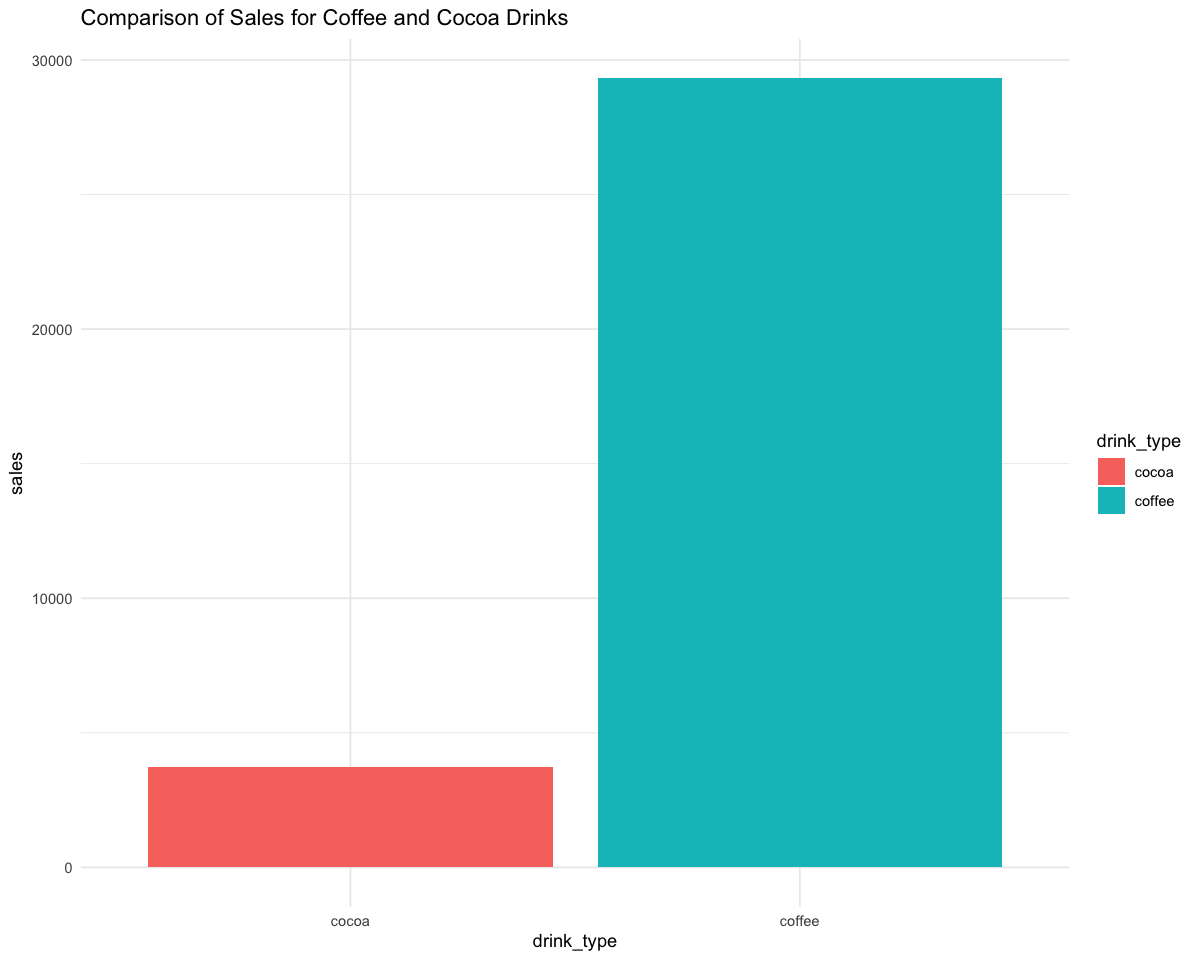

In [31]:
options(repr.plot.width = 10, repr.plot.height = 8)

coffee_sales %>% 
       # group data together by drink_type
       group_by(drink_type) %>% 
       # sum the price by drink type
       summarise(sales = sum(price))  %>%

       # implementing ggplot2
       ggplot( aes(x = drink_type, y = sales, fill = drink_type) ) + 
                geom_bar( stat = "identity") + 
                ggtitle( "Comparison of Sales for Coffee and Cocoa Drinks " ) +
                theme_minimal()

#### Example Plot 2: Bar Plot Sales by Drink

Visualizing the total sales by the `drink_name`


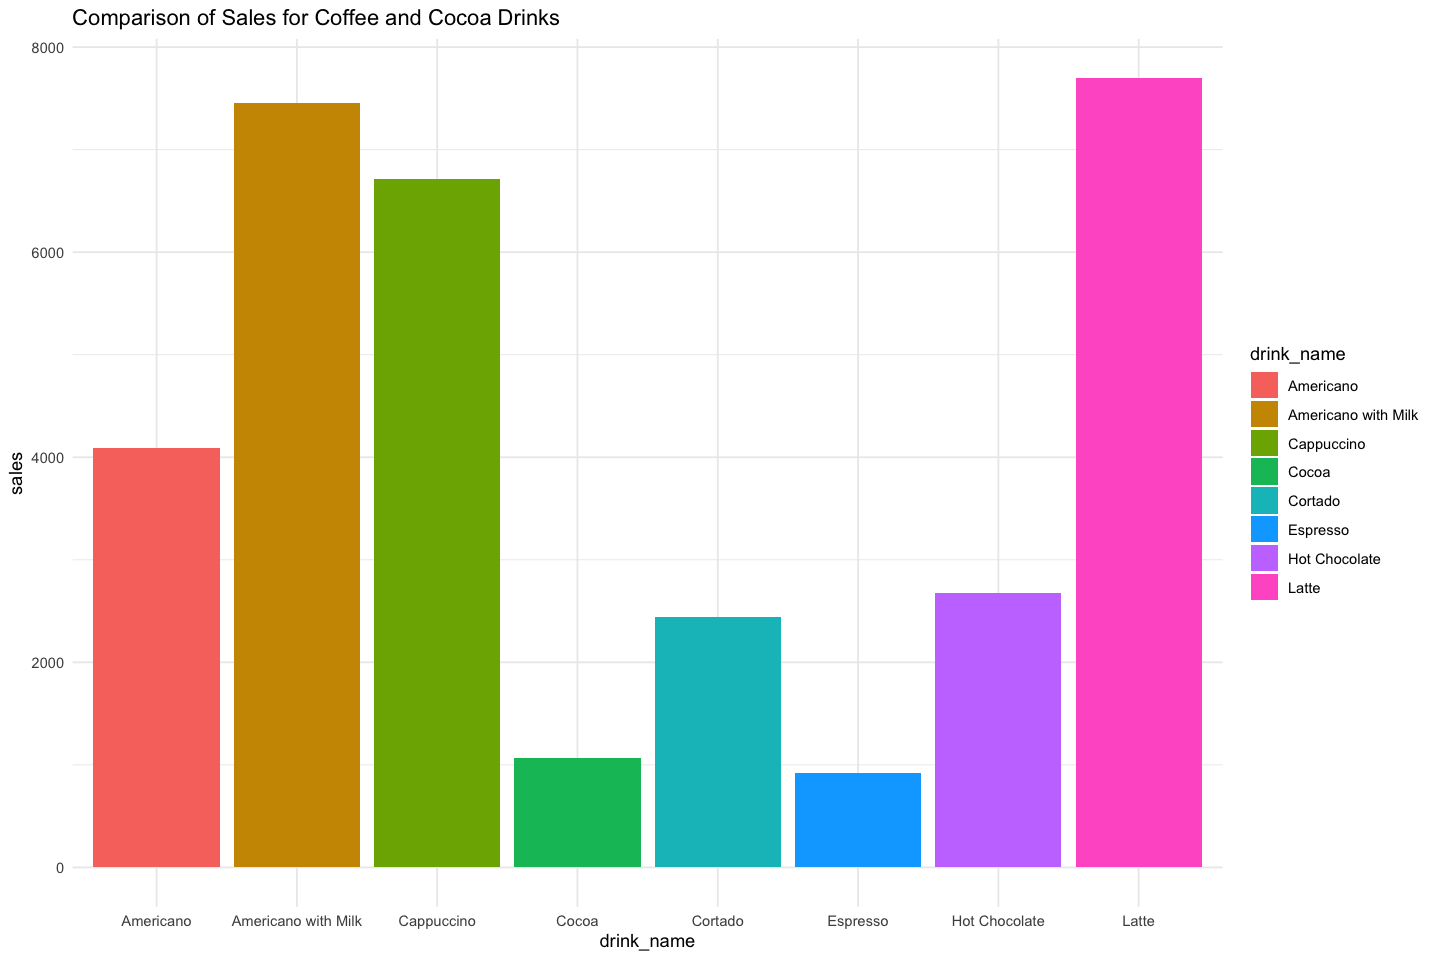

In [32]:
options(repr.plot.width = 12, repr.plot.height = 8)

coffee_sales %>% 
       # group data together by drink_type
       group_by(drink_name) %>% 
       # sum the price by drink type
       summarise(sales = sum(price))  %>%
       # sort by total sales
       arrange(desc(sales)) %>%

       # implementing ggplot2
       ggplot(. ,aes(x = drink_name, y = sales, fill = drink_name) ) + 
                geom_bar( stat = "summary", fun = "sum" ) + 
                ggtitle( "Comparison of Sales for Coffee and Cocoa Drinks " ) +
                theme_minimal()

### Example Plot 3: Adding a theme.

Here is an example of adding external themes to your plots.


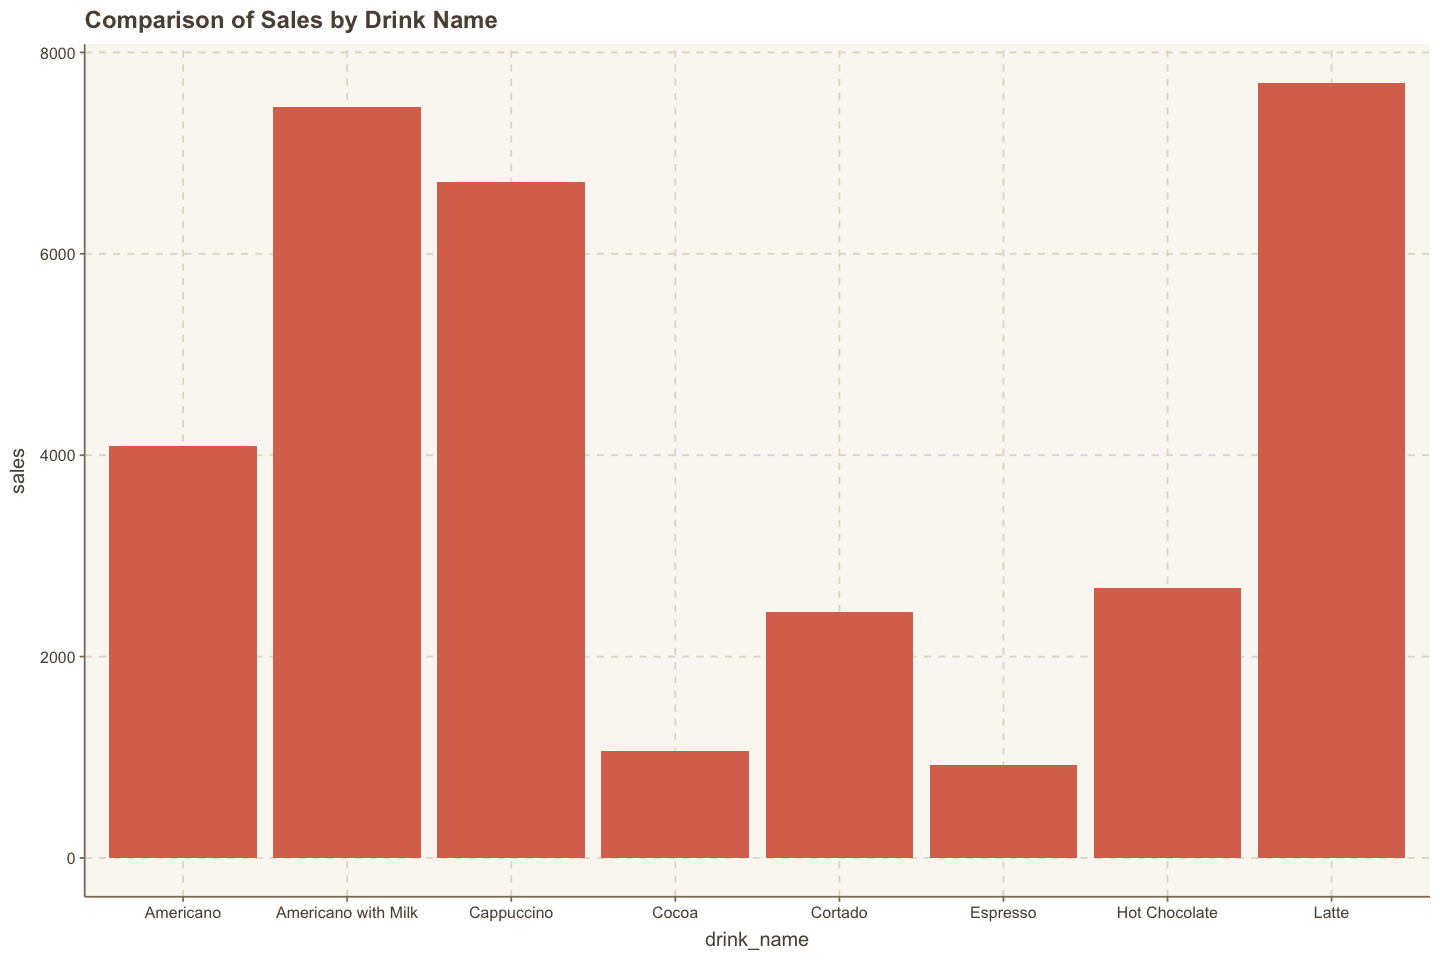

In [33]:
# loading the ggthemr package
library(ggthemr)

# setting the dust theme
ggthemr('dust')

coffee_sales %>% 
       # group data together by drink_type
       group_by(drink_name) %>% 
       # sum the price by drink type
       summarise(sales = sum(price))  %>%
       # sort by total sales
       arrange(desc(sales)) %>%

       # implementing ggplot2
       ggplot(. ,aes(x = drink_name, y = sales) ) + 
                geom_bar( stat = "summary", fun = "sum" ) + 
                ggtitle( "Comparison of Sales by Drink Name" )

#### Example Plot 4: Box Plots

The next example demonstrates building box plots to visualize the distributions of data by drink_type.

Warning message:
“The `scale_name` argument of `discrete_scale()` is deprecated as of ggplot2
3.5.0.”


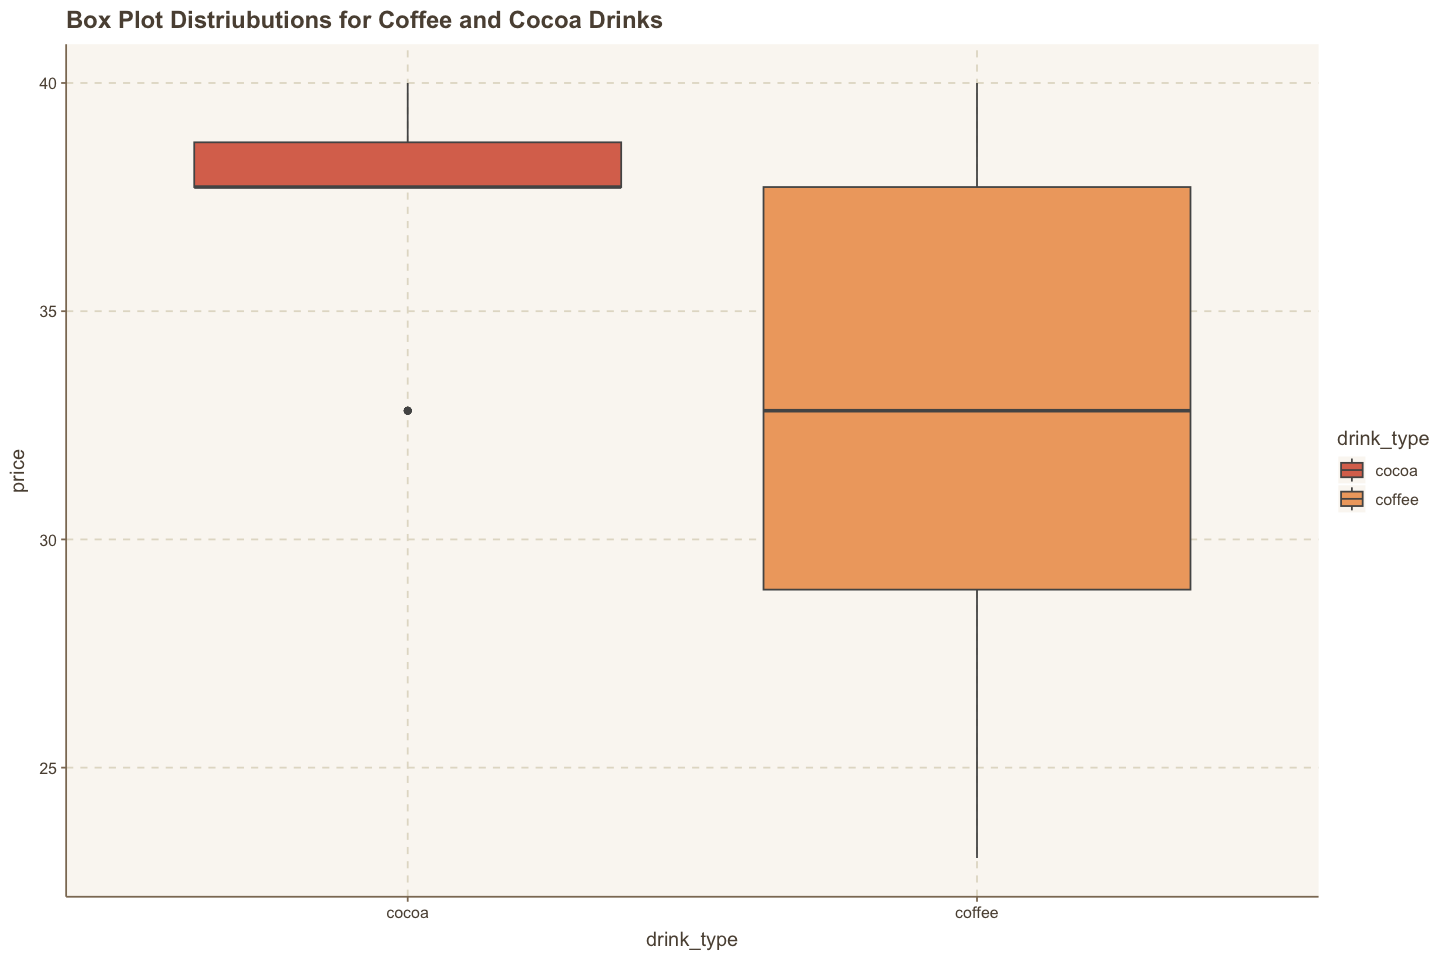

In [34]:
# implementing ggplot2
ggplot( data = coffee_sales, 
        aes(x = drink_type, y = price, fill=drink_type) ) + 
        geom_boxplot() + 
        ggtitle( "Box Plot Distriubutions for Coffee and Cocoa Drinks " )

### Example Plot 5: Time Series Plot

Finally, we generate a time series plot for daily sales.

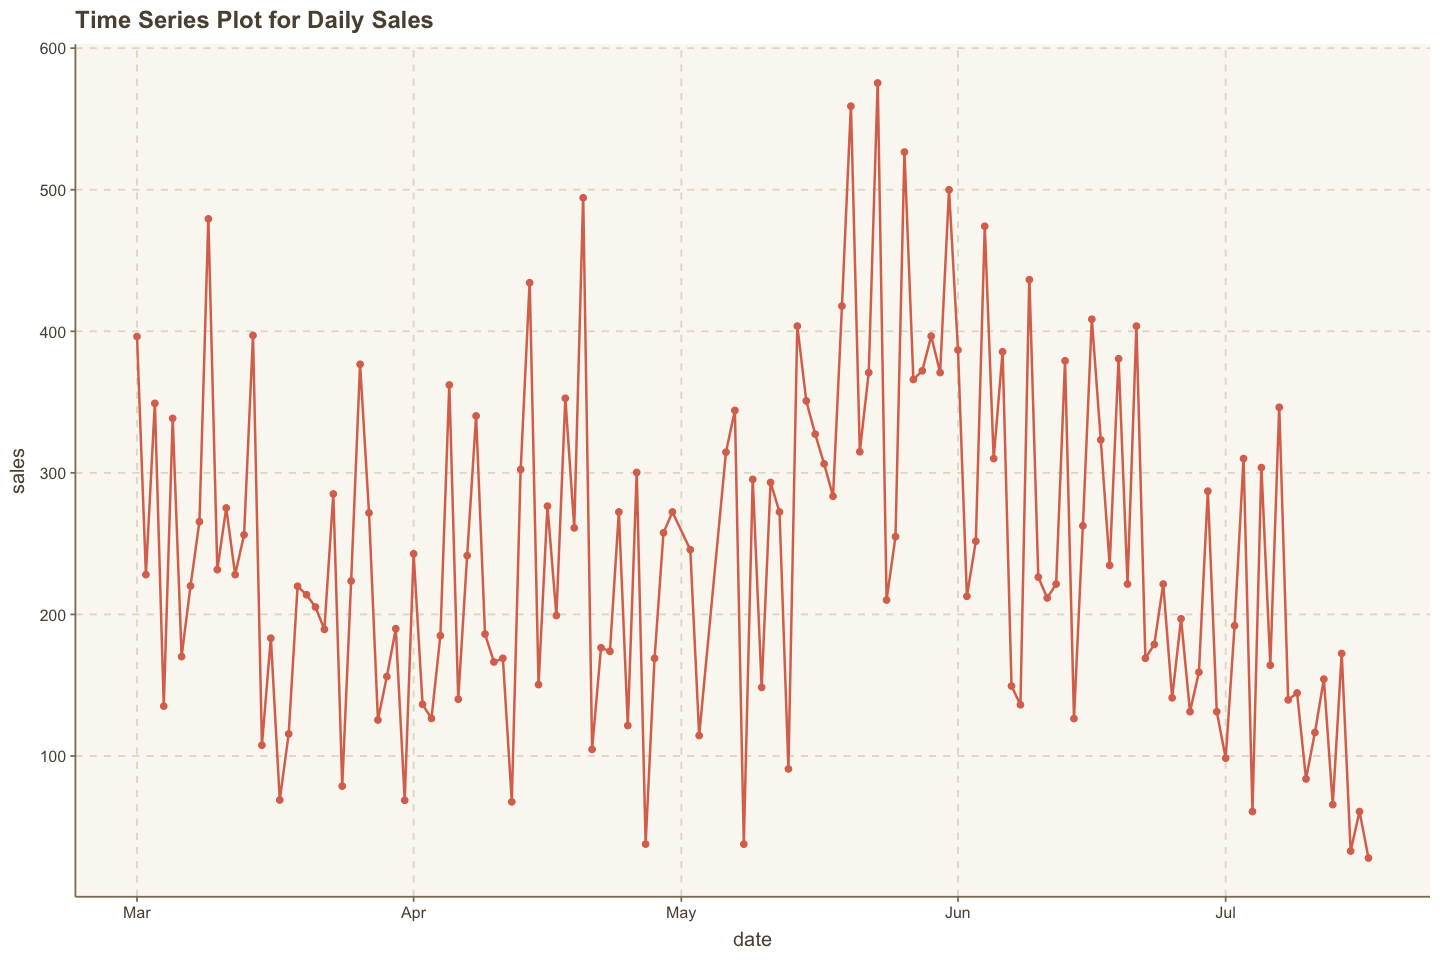

In [35]:
coffee_sales %>% 
       # Convert string dates into date 
       mutate(date = as.Date(date)) %>%
       # group data together by date
       group_by(date) %>% 
       # sum the price by date
       summarise(sales = sum(price))  %>%

       # implementing ggplot2
       ggplot(., aes(x = date, y = sales) ) +
                 geom_point() +
                 geom_line( linewidth=.7 ) +
                 ggtitle( "Time Series Plot for Daily Sales" )

This concludes our introduction to the Data Analytics Lab to prepare you to execute assignments and follow along with the material discussed in class.